# Homework 3

Try three different bootstrapping methods for estimating the
error bar on a statistic for a synthetic data that is IID by construction. For your
data set, draw a hundred samples from a normal distribution with zero mean and
unit variance. On this dataset, estimate the standard deviation (ground truth
value of which is unity), and its error bar. In the first method for error bar
estimation, do bootstrapping by selecting random halves of the data (e.g., 1000
random splits). In the second method, do bootstrapping by resampling (e.g.,
1000 times) with replacement from the full dataset. In the third method, apply
the Jackknife estimate. Compare the obtained error bar estimates.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 1) Generate the data and estimate its standard deviation
For your
data set, draw a hundred samples from a normal distribution with zero mean and
unit variance. On this dataset, estimate the standard deviation (ground truth
value of which is unity), and its error bar.

## Own Gaussian implementation

In [ ]:
N = 1000
mu  = 0
sigma = 1
xrange = [-5,5]
x = np.linspace(xrange[0]*sigma,xrange[1]*sigma,N) # draw from a uniform distribution

def gaussian(x, mu, sigma):
    """
    Parameters
    ----------
    x: an array of points at which to evaluate the Gaussian function
    mu : mean
    sigma : standard deviation

    Returns
    -------
    p : probability
    """
    p = np.zeros(N)
    p = (1/np.sqrt(2*np.pi*sigma**2)) * np.e**(-(1/2)*(x-mu)**2 / sigma**2)
    return p

In [ ]:
p = gaussian(x, 0,1)

In [ ]:
plt.plot(x,p)
plt.show()

In [ ]:
plt.hist(p, bins=10)
plt.show()

In [ ]:
n = gaussian(0,0,1)

In [ ]:
n

## NumPy libraries

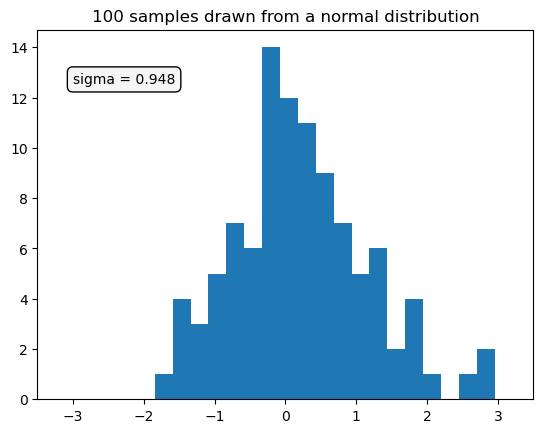

In [131]:
# Generate some data, set a fixed seed
rng = np.random.default_rng(seed=64)
data = rng.normal(loc=0, scale=1, size=100)

# Find the STD estimator
stdEstimator = np.std(data)

# Plot the data on a histogram
numbins=20
bins = np.linspace(data.min(), data.max(), numbins)
counts, _ = np.histogram(data, bins=bins, density=False)

plt.hist(data, bins=bins)
plt.xlim(-3.5,3.5)
plt.title('100 samples drawn from a normal distribution')
plt.text(-3,13,f'sigma = {stdEstimator:.3f}', verticalalignment='top', bbox=dict(facecolor='whitesmoke', edgecolor='k', boxstyle='round,pad=.4'))
plt.show()

# 2) Estimate the error bar on this estimator using different methods
On this dataset, estimate the standard deviation (ground truth
value of which is unity), and its error bar.
## a) In the first method for error bar estimation, do bootstrapping by selecting random halves of the data (e.g., 1000 random splits).

### Sample random subsets: random halves

In [3]:
subsetSize = int(len(data)/2)
permutations = 1000

def bootstrap_random_halves(data, subsetSize, permutations):
    '''
    Splits the data  into random halves (not preserving continuity, assuming IID).
    Input: data = 1D array, subsetSize = size of the random subset, permutations = number of samples to draw.
    Output: bootstrapped subsets (random halves).
    '''
    subsets = np.zeros((permutations, subsetSize))
    for run in range(permutations):
        # randomly select half the data points (k = length of subset) and store in an array where the rows are subsets and the columns are runs
        subsets[run,:] = random.choices(data, k=subsetSize)
    return subsets

In [48]:
subsets1 = bootstrap_random_halves(data, subsetSize, permutations)

### Plot one subset as a sanity check

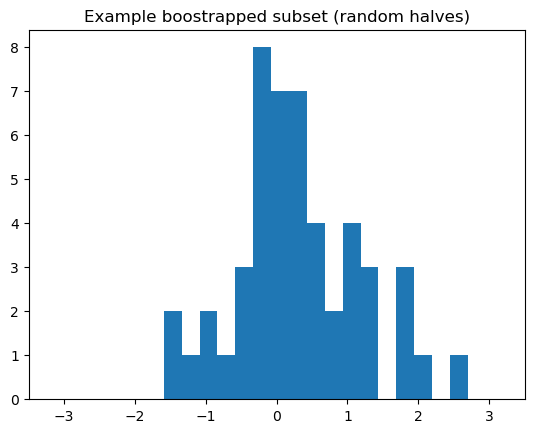

In [114]:
plt.hist(subsets1[0], bins[:-1])
plt.title('Example boostrapped subset (random halves)')
plt.xlim(-3.5,3.5)
plt.show()

### Find the error bar for this bootstrapping method

In [128]:
# First find the std for each subset
subset_stds1 = np.std(subsets1, axis=1)
# To get the error bar, take the std of these std estimates
std_errorbar1 = np.std(subset_stds1)

print(f'The error bar on the std estimate for this method is: {std_errorbar1:.3f}')

The error bar on the std estimate for this method is: 0.099


## b) In the second method, do bootstrapping by resampling (e.g., 1000 times) with replacement from the full dataset.

### Sample random subsets: bootstrap with replacement

In [134]:
subsetSize = int(data.size/2)
permutations = 1000

def bootstrap_with_replacement(data, subsetSize, permutations):
    '''
    Takes a random subset of the data by drawing each element individually with replacement.
    Input: data, subsetSize = size of the random subset, permutations = number of samples to draw.
    Output: bootstrapped subsets (with replacement)
    '''
    subsets = np.zeros((permutations, subsetSize)) # store sample for each permutation; may delete later
    for run in range(permutations):
        for element in range(subsetSize):
            subsets[run, element] = np.random.choice(data, replace=True)
    return subsets

subsets2 = bootstrap_with_replacement(data, subsetSize, permutations)

### Find the error bar

In [136]:
# First find the std for each subset
subset_stds2 = np.std(subsets2, axis=1)
# To get the error bar, take the std of these std estimates
std_errorbar2 = np.std(subset_stds2)

print(f'The error bar on the std estimate for this method is: {std_errorbar2:.3f}')

The error bar on the std estimate for this method is: 0.098


In [ ]:
binned_subsets2 = bin_subsets(subsets2, bins)

## c) In the third method, apply the Jackknife estimate.

### Take random subsets: Jackknife (leave each point out in turn)

In [168]:
subsetSize = data.size-1 # each subset will be the number of elements in our original dataset minus the one we leave out

def jackknife(data, subsetSize):
    '''
    Takes a random subset of the data by systematically excluding each element. The number of permutations is given by the size of the dataset.
    '''
    subsets = np.zeros((subsetSize+1, subsetSize)) # we want to loop through all the elements, so adding back 1 to the subset size
    for element in range(subsetSize+1):
        jackknifed_data = np.delete(data, element)
        subsets[element,:] = jackknifed_data
    return subsets

subsets3 = jackknife(data,subsetSize)

### Find the error bar for this bootstrapping method

In [171]:
# First find the std for each subset
subset_stds3 = np.std(subsets3, axis=1)
# To get the error bar, take the std of these std estimates
std_errorbar3 = np.std(subset_stds3)

print(f'The error bar on the std estimate for this method is: {std_errorbar3:.3f}')

The error bar on the std estimate for this method is: 0.007


# Compare the obtained error bar estimates.

In [177]:
plotEst = 3*[stdEstimator]
errorBars = [std_errorbar1, std_errorbar2, std_errorbar3]

In [178]:
plotEst
errorBars

[0.09888622756019788, 0.09826896020849214, 0.007389080232461994]

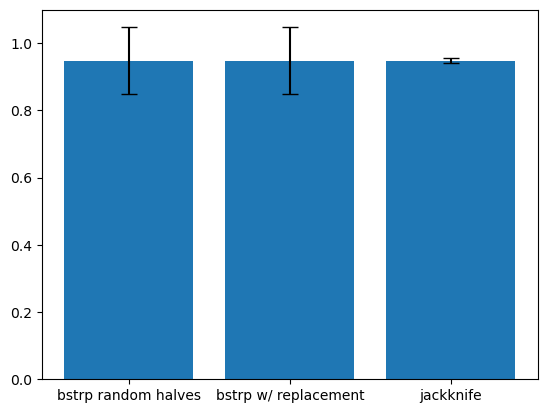

In [191]:
plt.bar(['bstrp random halves','bstrp w/ replacement','jackknife'], plotEst, yerr=errorBars, capsize=6)
plt.show()